<a href="https://colab.research.google.com/github/shikarRajcomar-Engineer/Ensemble/blob/master/Shear224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
Results=pd.DataFrame([])
Results1=pd.DataFrame([])
Results2=pd.DataFrame([])
Results3=pd.DataFrame([])
Results4=pd.DataFrame([])
Results5=pd.DataFrame([])
Results6=pd.DataFrame([])

Using TensorFlow backend.


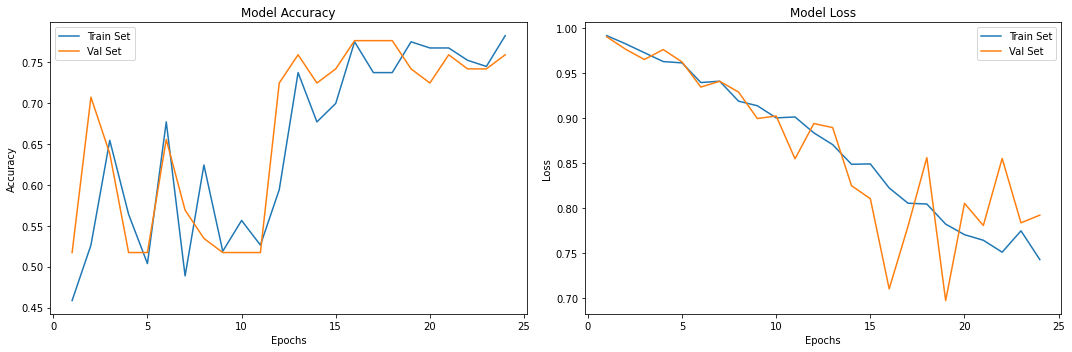

Train: 0.526, Test: 0.517


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.0,0.517241,0.517241,0.258621,0.267539,No Aug,Shear224,75.862068,78.195488
recall,0.0,1.000000,0.517241,0.500000,0.517241,No Aug,Shear224,75.862068,78.195488
f1-score,0.0,0.681818,0.517241,0.340909,0.352665,No Aug,Shear224,75.862068,78.195488
support,28.0,30.000000,0.517241,58.000000,58.000000,No Aug,Shear224,75.862068,78.195488


In [3]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



path='/content/drive/My Drive/B1-Msc experiment/'    

# Dataset=[
# # 'candy224'
# # ,'composition_vii224'
# # ,'feathers224'
# # ,'la_muse224'
# # ,'mosaic224'
# # ,'starry_night224'
# # ,'the_scream224'
# # ,'the_wave224'
# # ,'udnie224'
# 'samplepair224'
# # ,'candySP224'
# # ,'composition_viiSP224'
# ]
Dataset=[
'Shear224'        
]
Aug=['Original','HorizontalFlip','vertialFLip','Rotation','shear','width_shift_range','height_shift_range']

batch_size=32
steps=100


hist_results=[]


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['Shear224','Shear224','Shear224','Shear224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results=Results.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results)
keras.backend.clear_session()


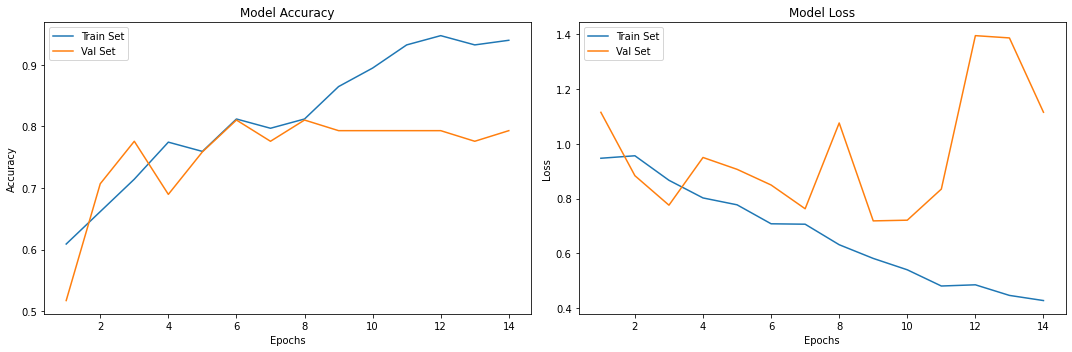

Train: 0.977, Test: 0.776


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.857143,0.72973,0.775862,0.793436,0.791240,HorizontalFlip,Shear224,79.310346,93.984962
recall,0.642857,0.90000,0.775862,0.771429,0.775862,HorizontalFlip,Shear224,79.310346,93.984962
f1-score,0.734694,0.80597,0.775862,0.770332,0.771561,HorizontalFlip,Shear224,79.310346,93.984962
support,28.000000,30.00000,0.775862,58.000000,58.000000,HorizontalFlip,Shear224,79.310346,93.984962


In [4]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



path='/content/drive/My Drive/B1-Msc experiment/'    


Dataset=[
'samplepair224'        
]
Aug=['Original','HorizontalFlip','vertialFLip','Rotation','shear','width_shift_range','height_shift_range']






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['Shear224','Shear224','Shear224','Shear224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results1=Results1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results1)
keras.backend.clear_session()


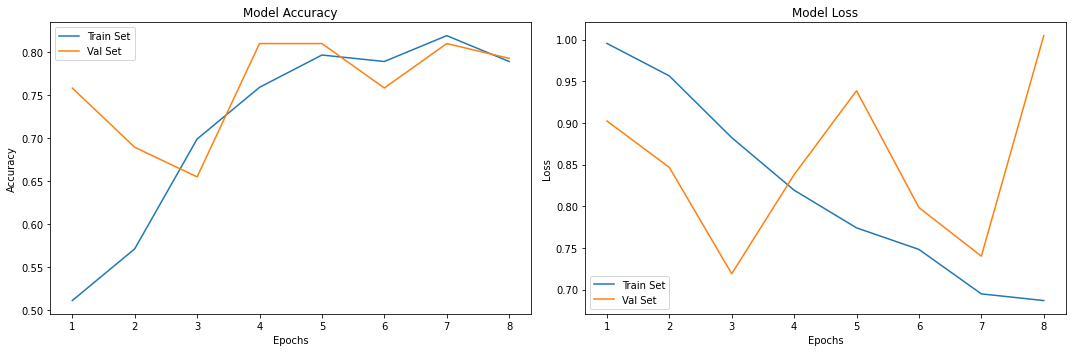

Train: 0.850, Test: 0.793


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.900000,0.736842,0.793103,0.818421,0.815608,vertialFLip,Shear224,79.310346,78.947371
recall,0.642857,0.933333,0.793103,0.788095,0.793103,vertialFLip,Shear224,79.310346,78.947371
f1-score,0.750000,0.823529,0.793103,0.786765,0.788032,vertialFLip,Shear224,79.310346,78.947371
support,28.000000,30.000000,0.793103,58.000000,58.000000,vertialFLip,Shear224,79.310346,78.947371


In [5]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



path='/content/drive/My Drive/B1-Msc experiment/'    


Dataset=[
'samplepair224'        
]
Aug=['Original','HorizontalFlip','vertialFLip','Rotation','shear','width_shift_range','height_shift_range']






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['Shear224','Shear224','Shear224','Shear224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results2=Results2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results2)
keras.backend.clear_session()


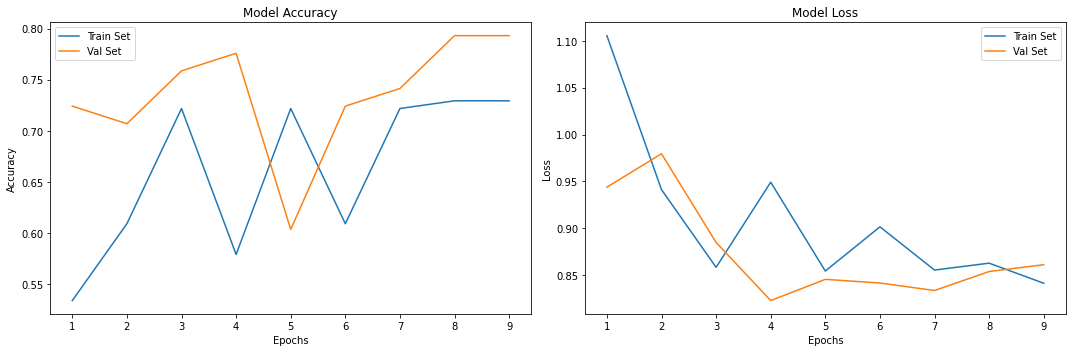

Train: 0.767, Test: 0.810


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.947368,0.743590,0.810345,0.845479,0.841966,Rotate,Shear224,79.310346,72.932333
recall,0.642857,0.966667,0.810345,0.804762,0.810345,Rotate,Shear224,79.310346,72.932333
f1-score,0.765957,0.840580,0.810345,0.803269,0.804555,Rotate,Shear224,79.310346,72.932333
support,28.000000,30.000000,0.810345,58.000000,58.000000,Rotate,Shear224,79.310346,72.932333


In [6]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



path='/content/drive/My Drive/B1-Msc experiment/'    


Dataset=[
'samplepair224'        
]
Aug=['Original','HorizontalFlip','vertialFLip','Rotation','shear','width_shift_range','height_shift_range']






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['Shear224','Shear224','Shear224','Shear224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results3=Results3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results3)
keras.backend.clear_session()


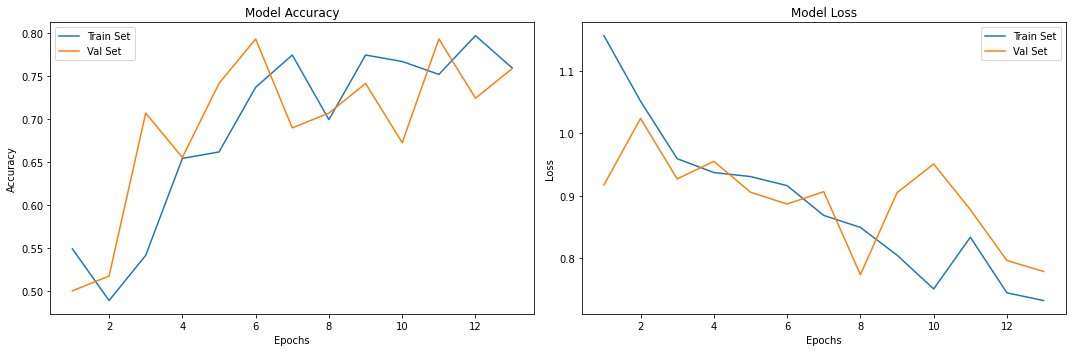

Train: 0.805, Test: 0.724


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.772727,0.694444,0.724138,0.733586,0.732236,Shear,Shear224,75.862068,75.939852
recall,0.607143,0.833333,0.724138,0.720238,0.724138,Shear,Shear224,75.862068,75.939852
f1-score,0.680000,0.757576,0.724138,0.718788,0.720125,Shear,Shear224,75.862068,75.939852
support,28.000000,30.000000,0.724138,58.000000,58.000000,Shear,Shear224,75.862068,75.939852


In [7]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



path='/content/drive/My Drive/B1-Msc experiment/'    


Dataset=[
'samplepair224'        
]
Aug=['Original','HorizontalFlip','vertialFLip','Rotation','shear','width_shift_range','height_shift_range']






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['Shear224','Shear224','Shear224','Shear224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results4=Results4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results4)
keras.backend.clear_session()


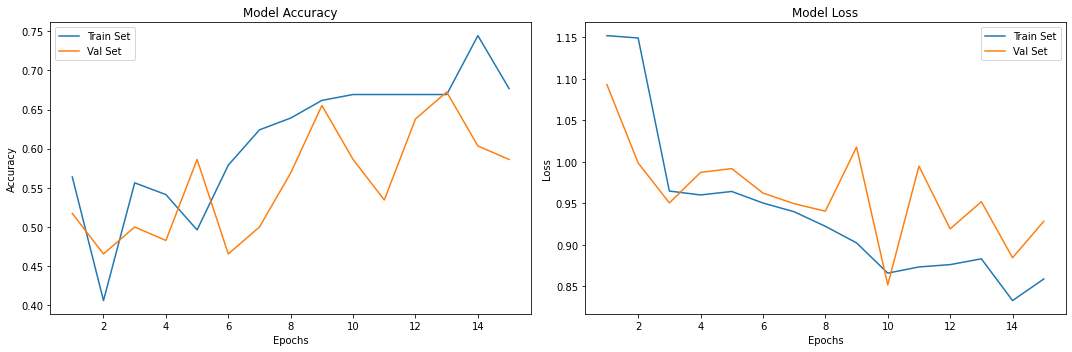

Train: 0.737, Test: 0.741


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.724138,0.758621,0.741379,0.741379,0.741974,Width,Shear224,58.620691,67.669171
recall,0.750000,0.733333,0.741379,0.741667,0.741379,Width,Shear224,58.620691,67.669171
f1-score,0.736842,0.745763,0.741379,0.741302,0.741456,Width,Shear224,58.620691,67.669171
support,28.000000,30.000000,0.741379,58.000000,58.000000,Width,Shear224,58.620691,67.669171


In [8]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



path='/content/drive/My Drive/B1-Msc experiment/'    


Dataset=[
'samplepair224'        
]
Aug=['Original','HorizontalFlip','vertialFLip','Rotation','shear','width_shift_range','height_shift_range']






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['Shear224','Shear224','Shear224','Shear224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results5=Results5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results5)
keras.backend.clear_session()


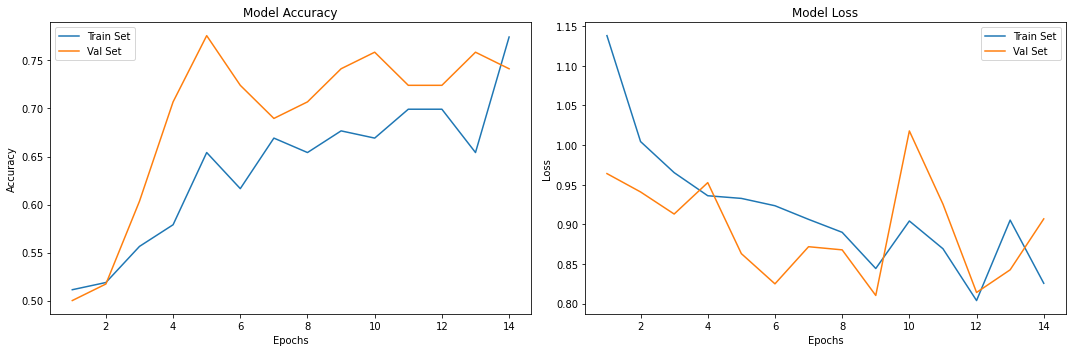

Train: 0.774, Test: 0.776


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.894737,0.717949,0.775862,0.806343,0.803295,height,Shear224,74.137932,77.443612
recall,0.607143,0.933333,0.775862,0.770238,0.775862,height,Shear224,74.137932,77.443612
f1-score,0.723404,0.811594,0.775862,0.767499,0.769020,height,Shear224,74.137932,77.443612
support,28.000000,30.000000,0.775862,58.000000,58.000000,height,Shear224,74.137932,77.443612


In [9]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



path='/content/drive/My Drive/B1-Msc experiment/'    


Dataset=[
'samplepair224'        
]
Aug=['Original','HorizontalFlip','vertialFLip','Rotation','shear','width_shift_range','height_shift_range']






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['Shear224','Shear224','Shear224','Shear224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results6=Results6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results6)
keras.backend.clear_session()


In [10]:
Final=pd.DataFrame([])
Final=Final.append(Results)
Final=Final.append(Results1)
Final=Final.append(Results2)
Final=Final.append(Results3)
Final=Final.append(Results4)
Final=Final.append(Results5)
Final=Final.append(Results6)

pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Final)

,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.000000,0.517241,0.517241,0.258621,0.267539,No Aug,Shear224,75.862068,78.195488
recall,0.000000,1.000000,0.517241,0.500000,0.517241,No Aug,Shear224,75.862068,78.195488
f1-score,0.000000,0.681818,0.517241,0.340909,0.352665,No Aug,Shear224,75.862068,78.195488
support,28.000000,30.000000,0.517241,58.000000,58.000000,No Aug,Shear224,75.862068,78.195488
precision,0.857143,0.729730,0.775862,0.793436,0.791240,HorizontalFlip,Shear224,79.310346,93.984962
recall,0.642857,0.900000,0.775862,0.771429,0.775862,HorizontalFlip,Shear224,79.310346,93.984962
f1-score,0.734694,0.805970,0.775862,0.770332,0.771561,HorizontalFlip,Shear224,79.310346,93.984962
support,28.000000,30.000000,0.775862,58.000000,58.000000,HorizontalFlip,Shear224,79.310346,93.984962
precision,0.900000,0.736842,0.793103,0.818421,0.815608,vertialFLip,Shear224,79.310346,78.947371
recall,0.642857,0.933333,0.793103,0.788095,0.793103,vertialFLip,Shear224,79.310346,78.947371
